## **1873026_임재랑**
**뉴스 데이터 분석 part**


**폰트 다운, 드라이브 연결, 라이브러리 import**

In [ ]:
!sudo apt-get install -y fonts-nanum  
!sudo fc-cache -fv                   
!rm ~/.cache/matplotlib -rf      


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np                  
import pandas as pd                       

from konlpy.tag import Kkma 
from konlpy.tag import Okt 

from wordcloud  import WordCloud

from collections import Counter

import warnings
warnings.filterwarnings('ignore')



In [ ]:
%config  InlineBackend.figure_format = "retina"  

In [ ]:
import  matplotlib 
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt


print('◎ matplotlib version : ', matplotlib.__version__)
print()


sys_font  = fm.findSystemFonts ( )

[ font  for  font  in  sys_font  if  "Nanum"  in font ]

◎ matplotlib version :  3.2.2



['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf']

In [ ]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

print("◎ 폰트 이름 : ",font_name)

plt.rc("font", family= font_name)      

fm._rebuild( )      

◎ 폰트 이름 :  NanumGothic


**저장한 뉴스 데이터 불러오기, 확인**

In [ ]:
news = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/웹과텍스트마이닝기말프로젝트/줌_뉴스_SF 영화_20200101_20220601.csv")

In [ ]:
news_old = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/웹과텍스트마이닝기말프로젝트/줌_뉴스_SF 영화_20100101_20120601.csv")

In [ ]:
news.shape

(139, 4)

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     139 non-null    object
 1   Datetime  139 non-null    object
 2   Article   139 non-null    object
 3   Link      139 non-null    object
dtypes: object(4)
memory usage: 4.5+ KB


In [ ]:
news.head(10)


,Title,Datetime,Article,Link
0,우리가 그리는 우주의 미래…'한국형 SF 영화·드라마'를 기다리며 [이종민의 콘텐츠...,2022.06.01,미래를 예측하는 가장 확실한 방법은 스스로 미래를 만드는 것이겠지만 상상력이 ...,한국경제
1,"""이거 SF 영화에서 봤던건데""...이통3사 '하늘 나는 차' 상용화 도전장 ...",2022.05.31,...,머니투데이
2,"'李 김포공항 이전' 연일 공격…與 ""SF영화?"" ""못먹어도 고?"" ...",2022.05.30,"이준석, ""김포→인천 10분?…탄도미사일 타고갈 것?"" 박대출 ""서울→제주 K...",이데일리
3,강수연 유작 '정이'에 관심…연상호 연출 SF 영화 ...,2022.05.08,"/ 출처: 넷플릭스 배우 강수연이 7일 세상을 떠난 가운데, 그의 마지막 작품 ...",TV조선
4,강수연이 남긴 마지막 작품은 ‘정이’…연상호 감독 SF 영화 ...,2022.05.07,영화배우 강수연씨가 7일 별세했다. 고인은 지난 5일 서울 강남구 압구정동 자택...,서울신문
5,"""AI가 날 울리고 웃기네""…SF영화부터 소설까지 집필하는 AI ...",2022.05.03,...,AI타임스
6,[책의 향기]최신 SF 영화와 수천 년 된 고전의 공통점은 ...,2022.04.30,◇채널을 돌리다가/곽재식 지음/392쪽·1만6000원·열린책들 제목에서부터...,동아일보
7,"강다니엘, SF 영화급 스케일로 돌아온다…'Ready to ride' 트레일러 공개...",2022.04.27,<이미지를 클릭하시면 크게 보실 수 있습니다> (엑스포츠뉴스 김노을 기자)...,엑스포츠뉴스
8,"""SF영화 속 가상인간이 현실로?""…KT, '기가지니 AI휴먼' 만든다 ...",2022.04.17,"기사내용 요약KT-딥브레인AI, '기가지니-AI휴먼 사업협력' MOU 체결 기가...",뉴시스
9,"韓 최초 우주 SF 영화 '승리호', 美 휴고상·네뷸러상 후보 ...",2022.04.12,한국 최초 우주 SF 영화 '승리호' 메인 포스터. 넷플릭스 제공<이미지를 클릭...,노컷뉴스


In [ ]:
news['Article']

0         미래를 예측하는 가장 확실한 방법은 스스로 미래를 만드는 것이겠지만 상상력이 ...
1                                                    ...
2         이준석, "김포→인천 10분?…탄도미사일 타고갈 것?" 박대출 "서울→제주 K...
3        / 출처: 넷플릭스 배우 강수연이 7일 세상을 떠난 가운데, 그의 마지막 작품 ...
4        영화배우 강수연씨가 7일 별세했다. 고인은 지난 5일 서울 강남구 압구정동 자택...
                             ...                        
134       ‘승리호’ 리뷰 출연 송중기 김태리 진선규 유해진 사진=넷플릭스  사람 냄새 ...
135      승리호 메인 포스터 ⓒ넷플릭스 제공<이미지를 클릭하시면 크게 보실 수 있습니다>...
136       뿌연 흙먼지로 뒤덮인 여의도 63빌딩과 광화문 사이로 우주정거장과 지구를 연결...
137      [서울=뉴시스] 영화 '승리호' 포스터. (사진=넷플릭스 제공) 2021.01....
138                                                  ...
Name: Article, Length: 139, dtype: object

In [ ]:
total = []
for i in news['Article']:
  total.append(i)

print(total)

['   미래를 예측하는 가장 확실한 방법은 스스로 미래를 만드는 것이겠지만 상상력이 풍부한 콘텐츠 창작자들이 꿈꾸는 미래를 엿보는 것도 좋은 방안이다. 공상과학(SF) 콘텐츠는 미래에 대한 상상력의 보고다. 영화 ‘스페이스 오디세이’는 50여 년 전에 스마트 패드를 선보였고, 1982년에 방영된 ‘전격 Z작전’에선 자율주행차 키트가 등장했다. ‘마이너리티 리포트’에서 가상 스크린을 허공에서 조작하는 모습이나, ‘킹스맨’의 가상현실 회의 장면도 많은 사람에게 내일에 대한 영감을 주었을 것이다. 최근 우주여행이 본격화하며, 우주나 근미래에서의 모험을 그리는 콘텐츠가 많이 나오면서 인기를 얻고 있다. 넷플릭스, 디즈니, 애플 등은 경쟁적으로 압도적 스케일의 공상과학 소설류의 SF 콘텐츠를 쏟아내고 있다. 그러나 음악, 드라마, 영화 등 다양한 콘텐츠로 글로벌 관객을 열광시키는 한국이 유독 SF 분야에서는 존재감이 크지 않다. 물론 ‘설국열차’나 ‘승리호’ 등 빼어난 콘텐츠가 있지만 로맨스, 누아르, 좀비 영화 등 다른 장르에 비하면 수량과 성과가 제한적이다. 아마도 그동안 미래를 그리는 이야기가 많지 않았던 것이 원인 중 하나일 것이다. 최근 SF 소설이 인기를 얻으며, 좋은 이야기가 많이 나오고 있다. 콘텐츠업계도 이에 반응해 김초엽 작가의 ‘지구 끝의 온실’ 같은 SF 소설을 드라마로 준비하고 있다.  또 다른 이유는 SF 콘텐츠의 엄청난 제작비와 제작 기간이다. 보통 SF 콘텐츠를 제작할 때는 아무것도 없는 그린스크린 앞에서 배우들이 상상에 의존해 힘들고 어색한 연기를 해야 한다. 이후 수많은 컴퓨터 그래픽 인력이 달라붙어 실재하지 않는 공간이나 캐릭터들을 만들어낸다. 컴퓨터 그래픽 비용만 해도 엄청난데, 이렇게 불완전한 환경에서 촬영한 결과물이 감독의 의도와 달라 다시 촬영하느라 비용과 시간이 배로 드는 일도 다반사다. 그래서 크리스토퍼 놀런 감독은 ‘인터스텔라’를 제작할 때 그린스크린에서의 작업을 줄이기 위해 전 스태프와 함께 아이슬란드에 가서 얼음 행성

In [ ]:
total_old = []
for i in news_old['Article']:
  total_old.append(i)

print(total_old)

['  조개껍데기 모양의 건축물 사진이 누리꾼들을 놀라게 하고 있다.  조개껍데기 모양의 건축물 사진이 누리꾼들을 놀라게 하고 있다.  최근 한 온라인 게시판에 ‘환상적인 조개집’이라는 제목으로 여러 장의 사진이 올라왔다.  사진을 보면 형형색색 조개 모양으로 만들어진 실제집들이 신비감을 자아낸다. 멕시코시티에 위치한 ‘노틸러스 하우스’로, 멕시코 건축가 자비에르 세노시엔이 자연의 동식물에서 영감을 얻어 만들었다고 알려졌다.  조개집들은 제각각 하나의 대형 미술품과 다름없다.  달팽이를 형상화한 집이 있고, 껍질 내부에서부터 차례로 벽을 쌓아 나선형으로 자라나는 바다생물 앵무조개의 생김새를 본떠 만든 집도 있다.  내부 또한 그럴싸하다. 정원식으로 시작된 거실에서부터 주방, 침실, 화장실, 서재 등의 공간이 미로처럼 구성되어 있다.  누리꾼들은 “공상과학영화의 한 장면 같다” “저런 집에서 살면 없던 창의력도 생기겠다” “자연에서 온 소재인 만큼 주변 숲과 절묘하게 어울린다” 등 부럽다는 반응을 보였다.  사진= 멕시코 건축가 자비에르 세노시엔 홈페이지  [매경닷컴 MK스포츠 온라인뉴스팀]   [ⓒ 매일경제 & mk.co.kr, 무단전재 및 재배포 금지]                                   이\u2000기사의\u2000카테고리는\u2000언론사의\u2000분류를\u2000따릅니다.                                          기사가 속한 카테고리는 언론사가 분류합니다.                                         언론사는 한 기사를 두 개 이상의 카테고리로 분류할 수 있습니다.                                       ', "   [OSEN=김경주 기자] 우주를 배경으로 했던 영화들이 모두 흥행에 성공하며 영화에 '우주'를 담으면 뜬다는 새로운 흥행 공식이 대두돼 눈길을 끌고 있다.   영화 '스타워즈', '아마겟돈', '스타트랙' 등 우주를 소재로 하는

**world cloud를 통한 시각화**

In [ ]:
# 두음절 이상만 추출


okt = Okt()

def tokenizer(text) :
    nouns = okt.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]


In [ ]:
# 단어의 출현 횟수 카운트


counts = Counter(tokenizer(str(total)))      # 위 함수를 호출 
counts_old = Counter(tokenizer(str(total_old))) 

#불용어 제거
counts.pop('영화')
counts.pop('기사')
counts.pop('기자')
counts.pop('클릭')
counts.pop('크게')
counts.pop('금지')
counts.pop('언론사')
counts.pop('카테고리')
counts.pop('분류')
counts.pop('이미지')
counts.pop('봉준호')
counts.pop('한국')
counts.pop('감독')

counts_old.pop('영화')
counts_old.pop('기사')
counts_old.pop('기자')
counts_old.pop('클릭')
counts_old.pop('크게')
counts_old.pop('금지')
counts_old.pop('언론사')
counts_old.pop('카테고리')
counts_old.pop('분류')
counts_old.pop('이미지')
counts_old.pop('봉준호')
counts_old.pop('한국')
counts_old.pop('감독')
counts_old.pop('이상')
counts_old.pop('배포')
counts_old.pop('무단')
counts_old.pop('개봉')
counts_old.pop('사진')
counts_old.pop('지난')
counts_old.pop('배우')
counts_old.pop('리포트')
counts_old.pop('영상')


words = counts.most_common(100)
words_old = counts_old.most_common(100)                

print(words)
print(words_old)


[('기술', 238), ('우주', 169), ('이상', 163), ('로봇', 162), ('미래', 156), ('인간', 154), ('공개', 148), ('승리', 145), ('통해', 137), ('사진', 117), ('세계', 116), ('넷플릭스', 103), ('작품', 102), ('사람', 100), ('무단', 100), ('배포', 100), ('배우', 88), ('모습', 87), ('뉴스', 86), ('현실', 85), ('영상', 84), ('미국', 84), ('이야기', 82), ('대한', 80), ('개봉', 80), ('우리', 73), ('영화제', 73), ('중국', 72), ('디스플레이', 70), ('개발', 70), ('위해', 69), ('제공', 67), ('인공', 67), ('버스', 67), ('지구', 66), ('지난', 66), ('시간', 65), ('생각', 65), ('제작', 62), ('서울', 62), ('과학', 61), ('사업', 61), ('인류', 61), ('장면', 60), ('최근', 60), ('등장', 59), ('메타', 59), ('소설', 58), ('다른', 58), ('발전', 58), ('전자', 58), ('춘천', 56), ('공간', 55), ('탄소', 55), ('이번', 54), ('예정', 54), ('코로나', 53), ('대표', 52), ('디지털', 51), ('계획', 51), ('가상', 50), ('지능', 50), ('뉴시스', 50), ('모두', 50), ('관객', 49), ('기업', 48), ('체험', 48), ('글로벌', 47), ('세상', 47), ('주인공', 47), ('활용', 46), ('진행', 46), ('시작', 46), ('송중기', 46), ('때문', 46), ('이후', 45), ('촬영', 45), ('배경', 45), ('저작권', 45), ('그룹', 45), ('콘텐츠', 4

{'기술': 238, '우주': 169, '이상': 163, '로봇': 162, '미래': 156, '인간': 154, '공개': 148, '승리': 145, '통해': 137, '사진': 117, '세계': 116, '넷플릭스': 103, '작품': 102, '사람': 100, '무단': 100, '배포': 100, '배우': 88, '모습': 87, '뉴스': 86, '현실': 85, '영상': 84, '미국': 84, '이야기': 82, '대한': 80, '개봉': 80, '우리': 73, '영화제': 73, '중국': 72, '디스플레이': 70, '개발': 70, '위해': 69, '제공': 67, '인공': 67, '버스': 67, '지구': 66, '지난': 66, '시간': 65, '생각': 65, '제작': 62, '서울': 62, '과학': 61, '사업': 61, '인류': 61, '장면': 60, '최근': 60, '등장': 59, '메타': 59, '소설': 58, '다른': 58, '발전': 58, '전자': 58, '춘천': 56, '공간': 55, '탄소': 55, '이번': 54, '예정': 54, '코로나': 53, '대표': 52, '디지털': 51, '계획': 51, '가상': 50, '지능': 50, '뉴시스': 50, '모두': 50, '관객': 49, '기업': 48, '체험': 48, '글로벌': 47, '세상': 47, '주인공': 47, '활용': 46, '진행': 46, '시작': 46, '송중기': 46, '때문': 46, '이후': 45, '촬영': 45, '배경': 45, '저작권': 45, '그룹': 45, '콘텐츠': 44, '미키': 44, '존재': 43, '플랫폼': 43, '처음': 43, '조성': 43, '자동차': 42, '구현': 42, '시대': 42, '아이': 42, '뮤직비디오': 42, '연기': 41, '실제': 41, '지난해': 41, '자신': 41, '시리즈': 41, '

<Figure size 2160x360 with 0 Axes>

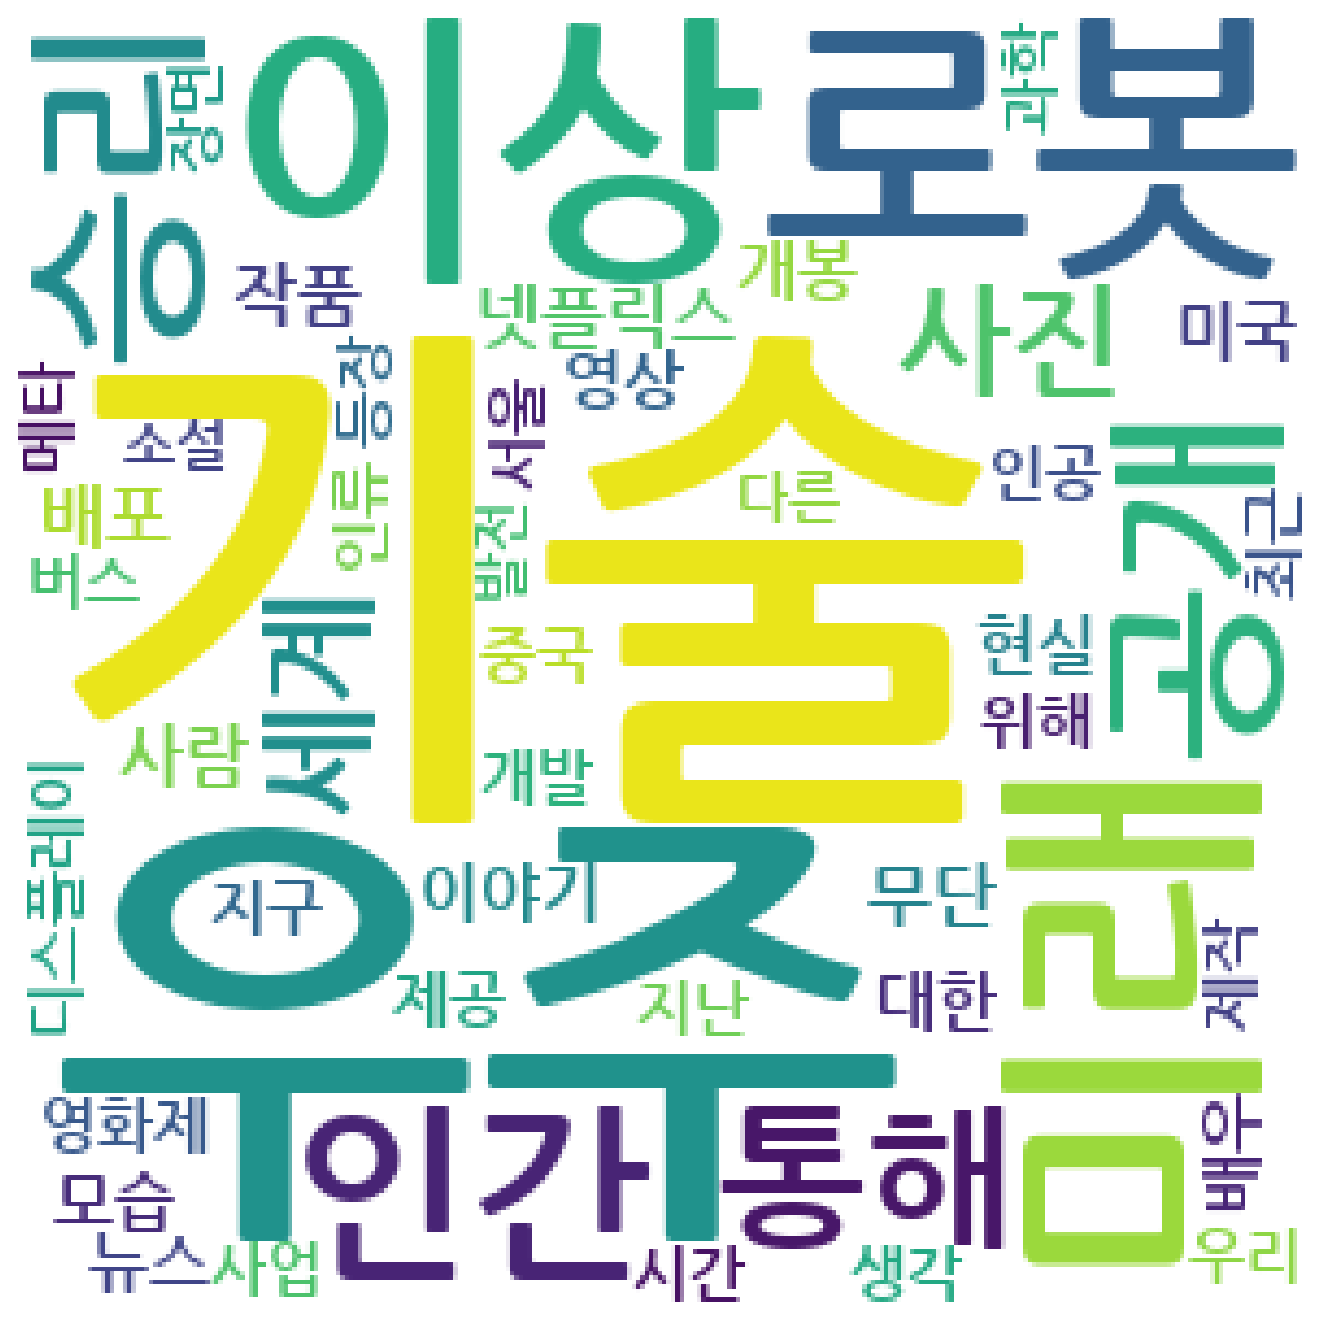

In [ ]:
#wordcloud 로 시각화 최신 뉴스 기사
wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width = 300, 
    height = 300,
    max_words=50,
    random_state=0
)

plt.figure(figsize=(30,5))

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))  

fig = plt.figure(figsize=(14, 12))

plt.axis('off')

plt.imshow(cloud)


{'세계': 123, '관객': 123, '기술': 100, '미국': 91, '등장': 90, '모습': 89, '통해': 88, '위해': 87, '공개': 86, '할리우드': 85, '사람': 81, '인류': 80, '멸망': 79, '이야기': 79, '때문': 78, '작품': 77, '대한': 76, '촬영': 76, '스타': 75, '로봇': 75, '이번': 74, '블랙': 71, '서울': 70, '예정': 68, '방송': 67, '뉴스': 66, '화면': 66, '인터넷': 66, '조지영': 66, '시작': 65, '제작': 64, '전문': 64, '생각': 64, '아이': 64, '다른': 64, '미디어': 63, '교육': 63, '저작권': 59, '인간': 59, '어벤져스': 59, '장면': 58, '미래': 58, '심형래': 58, '현재': 57, '디지털': 56, '정보': 56, '스미스': 56, '정도': 55, '최고': 54, '개발': 54, '화제': 54, '액션': 53, '우리': 53, '시뮬레이션': 52, '가장': 52, '지구': 51, '일본': 51, '모든': 51, '무대': 50, '우주': 49, '세상': 49, '자신': 49, '이용': 48, '전쟁': 48, '연출': 48, '국내': 47, '진행': 47, '보고서': 47, '대표': 47, '노래': 47, '이병헌': 47, '최근': 46, '소재': 45, '시리즈': 45, '관심': 45, '동영상': 45, '동시': 45, '명의': 45, '인기': 44, '그린': 44, '한편': 44, '가지': 44, '스타워즈': 43, '상황': 43, '외계인': 43, '사용': 42, '연기': 42, '엔터테인먼트': 41, '현실': 41, '주연': 41, '이후': 41, '시장': 41, '지금': 41, '누적': 41, '연구': 40, '보고': 40, '게임': 40, 

<Figure size 2160x360 with 0 Axes>

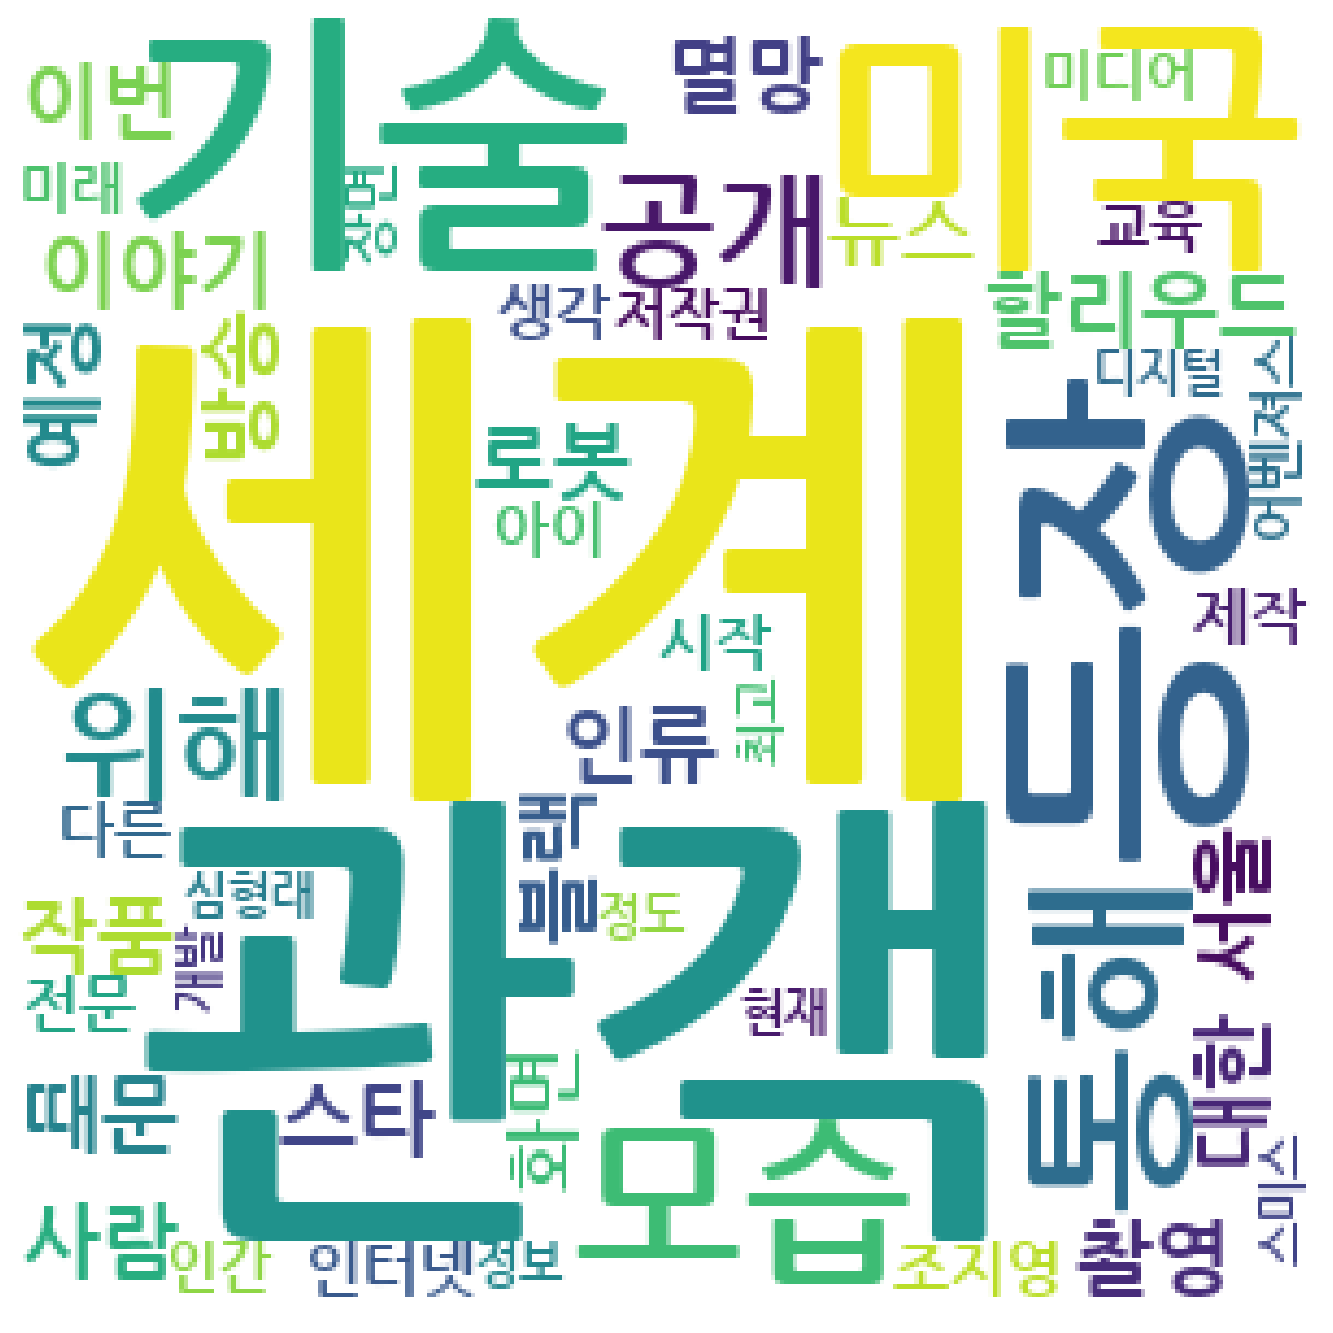

In [ ]:
#wordcloud 로 시각화 10년 전 뉴스 기사
wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width = 300, 
    height = 300,
    max_words=50,
    random_state=0
)

plt.figure(figsize=(30,5))

print(dict(words_old))

cloud_old = wordcloud.generate_from_frequencies(dict(words_old))  

fig = plt.figure(figsize=(14, 12))

plt.axis('off')

plt.imshow(cloud_old)